In [190]:
#데이터 로드
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

file_path = "./car_evaluation.csv"
df = pd.read_csv(file_path)

In [192]:
#결측치 확인
missing_values = df.isnull().sum()
print(missing_values)

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


In [194]:
# 컬럼명 변경 (rename)
df.rename(columns={
    'vhigh': 'buying',
    'vhigh.1': 'maint',
    '2': 'doors',
    '2.1': 'persons',
    'small': 'lug_boot',
    'low': 'safety',
    'unacc': 'class'
}, inplace=True)

In [196]:
#컬럼명 변경 확인
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [198]:
# 변경된 데이터 확인
print(df)

     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    med  unacc
1     vhigh  vhigh      2       2    small   high  unacc
2     vhigh  vhigh      2       2      med    low  unacc
3     vhigh  vhigh      2       2      med    med  unacc
4     vhigh  vhigh      2       2      med   high  unacc
...     ...    ...    ...     ...      ...    ...    ...
1722    low    low  5more    more      med    med   good
1723    low    low  5more    more      med   high  vgood
1724    low    low  5more    more      big    low  unacc
1725    low    low  5more    more      big    med   good
1726    low    low  5more    more      big   high  vgood

[1727 rows x 7 columns]


In [200]:
# LabelEncoder 초기화

label_encoder = LabelEncoder()

# 특정 컬럼만 인코딩

columns_to_encode = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']  # 인코딩할 컬럼 리스트

for column in columns_to_encode:

    df[column] = label_encoder.fit_transform(df[column])

print(df)

      buying  maint  doors  persons  lug_boot  safety  class
0          3      3      0        0         2       2      2
1          3      3      0        0         2       0      2
2          3      3      0        0         1       1      2
3          3      3      0        0         1       2      2
4          3      3      0        0         1       0      2
...      ...    ...    ...      ...       ...     ...    ...
1722       1      1      3        2         1       2      1
1723       1      1      3        2         1       0      3
1724       1      1      3        2         0       1      2
1725       1      1      3        2         0       2      1
1726       1      1      3        2         0       0      3

[1727 rows x 7 columns]


In [202]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt

In [204]:
# 특성(X)과 타겟(y) 데이터 정의
X = df.drop(columns=['class'], axis = 1)  # 'survived'는 예측할 값이므로 제외
y = df['class']  # 타겟 값 'survived'

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
# 분류 모델 리스트
models = {
    "Random Forest": RandomForestClassifier(max_depth = 5, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth = 3, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42)
}

In [210]:
# 모델 학습 및 평가
for model_name, model in models.items():
    print(f"Evaluating {model_name}:")
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 정확도 평가
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

Evaluating Random Forest:
Accuracy: 0.8237
Evaluating Decision Tree:
Accuracy: 0.7832
Evaluating Support Vector Machine:
Accuracy: 0.8988
Evaluating Logistic Regression:
Accuracy: 0.6850


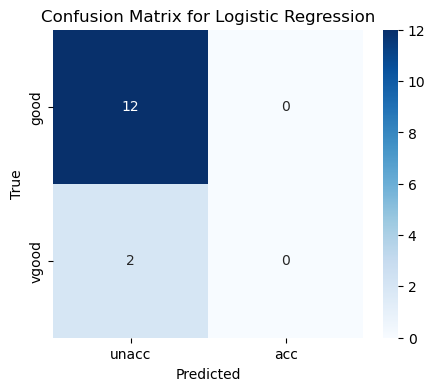

In [214]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['unacc', 'acc'], yticklabels=['good', 'vgood'])
plt.title(f"Confusion Matrix for {model_name}")
plt.xlabel('Predicted')
plt.ylabel('True')

# 그래프 출력
plt.show()